# Exploring Big Data

***

## Project Description

This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

This task will assess some of the core skills expected in a Big Data engineer at ANZ, particularly your familiarity with Apache Spark.

Using each API, perform the following transformation steps using the synthetic transaction file as input referenced as an input argument to your program. Output the results to a local file.

- Project only the records where status=authorized AND card_present_flag=0
- Split the long_lat and merchant_long_lat fields into long, lat and merch_long, merch_lat fields
- Output the data as a CSV file

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Plotly
# import plotly.express as px
# import plotly.offline as py
# import plotly.graph_objs as go

import sweetviz

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
# import researchpy as rp

import datetime
from datetime import datetime, timedelta

# import eli5
# from IPython.display import display

#import os
#import zipfile
import scipy.stats
from collections import Counter

import sklearn
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
# from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet, Lasso, Ridge
# from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score
# from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

# from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor, plot_tree
# from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
# from sklearn.naive_bayes import GaussianNB, MultinomialNB

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Feature-Engine library
#import feature_engine
#from feature_engine import imputation as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser
#from feature_engine.discretisation import ArbitraryDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("BIGDATAContentTask.csv")

In [3]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.00,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,1/8/2018,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.00,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,1/8/2018,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.00,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,1/8/2018,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.00,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,1/8/2018,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.00,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,1/8/2018,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

In [5]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.00,883.00,12043.00,12043.00,12043.00
mean,0.80,0.00,14704.20,30.58,187.93
std,0.40,0.00,31503.72,10.05,592.60
min,0.00,0.00,0.24,18.00,0.10
25%,1.00,0.00,3158.59,22.00,16.00
50%,1.00,0.00,6432.01,28.00,29.00
75%,1.00,0.00,12465.94,38.00,53.66
max,1.00,0.00,267128.52,78.00,8835.98


In [6]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account', 'currency', 'long_lat', 'txn_description', 'merchant_id', 'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age', 'merchant_suburb', 'merchant_state', 'extraction', 'amount', 'transaction_id', 'country', 'customer_id', 'merchant_long_lat', 'movement'], dtype='object')

In [7]:
df.status.value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

In [8]:
df2 = df[df.status == "authorized"]
df2

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.00,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,1/8/2018,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.00,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,1/8/2018,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.00,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,1/8/2018,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.00,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,1/8/2018,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.00,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,1/8/2018,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.00,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,14054.14,31/10/2018,F,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.00,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,9137.79,31/10/2018,M,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.00,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,45394.57,31/10/2018,M,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.00,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,11350.67,31/10/2018,M,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit


In [9]:
df3 = df2[df2.card_present_flag == 0.00]
df3

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
1,authorized,0.00,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,1/8/2018,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
21,authorized,0.00,NaN,ACC-2890243754,AUD,153.32 -27.93,POS,7e8bf667-e724-4359-a406-3538a3e27b4e,NaN,Joseph,275.93,1/8/2018,M,37,Lismore,NSW,2018-08-01T08:19:14.000+0000,24.77,1f12467d33ce4609890fb64978ebbcbb,Australia,CUS-2695611575,153.28 -28.81,debit
23,authorized,0.00,NaN,ACC-2615038700,AUD,145.35 -38.03,POS,354f40cb-55bc-4a81-a00d-c7faede29f8b,NaN,Emily,30583.15,1/8/2018,F,43,Mordialloc,VIC,2018-08-01T08:47:48.000+0000,12.08,49417bad354f4137971a954c26657e2d,Australia,CUS-3255104878,145.09 -38.01,debit
29,authorized,0.00,NaN,ACC-1710017148,AUD,150.82 -34.01,SALES-POS,4af25042-a1a4-4688-90b5-240d790e5332,NaN,Michelle,1625.34,1/8/2018,F,19,Alexandria,NSW,2018-08-01T09:11:00.000+0000,11.57,82acf03790844776b4587fd6e6f526c5,Australia,CUS-883482547,151.19 -33.92,debit
31,authorized,0.00,NaN,ACC-3485804958,AUD,138.52 -35.01,POS,a08935a2-99a8-49f0-b73a-f8de51ca0abd,NaN,Jessica,12529.59,1/8/2018,F,34,Findon,SA,2018-08-01T09:19:06.000+0000,33.89,89050ee5c5aa4e79b03e717518236bf9,Australia,CUS-1196156254,138.53 -34.9,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12012,authorized,0.00,NaN,ACC-3954677887,AUD,115.72 -32.28,SALES-POS,4995bfd1-13d8-4c5f-a9f3-d5331da83f85,NaN,Ruth,9901.03,31/10/2018,F,47,Joondalup,WA,2018-10-31T18:14:59.000+0000,15.91,063fb5b8132b4da5814aa98b0bf06e30,Australia,CUS-3716701010,115.77 -31.74,debit
12015,authorized,0.00,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,e4758c3b-e8d8-49bd-990a-a823a86dcabc,NaN,Diana,2194.26,31/10/2018,F,26,Mudgeeraba,QLD,2018-10-31T19:04:59.000+0000,25.88,bb90a98fdcbd40a69ad40a4fcd3971f6,Australia,CUS-2487424745,153.36 -28.07,debit
12016,authorized,0.00,NaN,ACC-2249586092,AUD,115.98 -32.07,SALES-POS,23eccb68-684e-4321-b95b-dc307517c836,NaN,Edward,12963.75,31/10/2018,M,19,Maylands,WA,2018-10-31T19:18:09.000+0000,9.90,9c33934bede248ada7bd4126be6a167e,Australia,CUS-443776336,115.9 -31.93,debit
12031,authorized,0.00,NaN,ACC-1443681913,AUD,150.92 -33.77,SALES-POS,6fcdc956-3548-40b2-a2ce-9dbc6cb64eb9,NaN,Ryan,5540.27,31/10/2018,M,31,Marrickville,NSW,2018-10-31T21:56:11.000+0000,70.51,f82ed841f0404363b4a3782ce6118294,Australia,CUS-3129499595,151.17 -33.91,debit


In [10]:
df3.reset_index(inplace=True, drop=True)

In [11]:
df3

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,0.00,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,1/8/2018,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
1,authorized,0.00,NaN,ACC-2890243754,AUD,153.32 -27.93,POS,7e8bf667-e724-4359-a406-3538a3e27b4e,NaN,Joseph,275.93,1/8/2018,M,37,Lismore,NSW,2018-08-01T08:19:14.000+0000,24.77,1f12467d33ce4609890fb64978ebbcbb,Australia,CUS-2695611575,153.28 -28.81,debit
2,authorized,0.00,NaN,ACC-2615038700,AUD,145.35 -38.03,POS,354f40cb-55bc-4a81-a00d-c7faede29f8b,NaN,Emily,30583.15,1/8/2018,F,43,Mordialloc,VIC,2018-08-01T08:47:48.000+0000,12.08,49417bad354f4137971a954c26657e2d,Australia,CUS-3255104878,145.09 -38.01,debit
3,authorized,0.00,NaN,ACC-1710017148,AUD,150.82 -34.01,SALES-POS,4af25042-a1a4-4688-90b5-240d790e5332,NaN,Michelle,1625.34,1/8/2018,F,19,Alexandria,NSW,2018-08-01T09:11:00.000+0000,11.57,82acf03790844776b4587fd6e6f526c5,Australia,CUS-883482547,151.19 -33.92,debit
4,authorized,0.00,NaN,ACC-3485804958,AUD,138.52 -35.01,POS,a08935a2-99a8-49f0-b73a-f8de51ca0abd,NaN,Jessica,12529.59,1/8/2018,F,34,Findon,SA,2018-08-01T09:19:06.000+0000,33.89,89050ee5c5aa4e79b03e717518236bf9,Australia,CUS-1196156254,138.53 -34.9,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,authorized,0.00,NaN,ACC-3954677887,AUD,115.72 -32.28,SALES-POS,4995bfd1-13d8-4c5f-a9f3-d5331da83f85,NaN,Ruth,9901.03,31/10/2018,F,47,Joondalup,WA,2018-10-31T18:14:59.000+0000,15.91,063fb5b8132b4da5814aa98b0bf06e30,Australia,CUS-3716701010,115.77 -31.74,debit
1519,authorized,0.00,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,e4758c3b-e8d8-49bd-990a-a823a86dcabc,NaN,Diana,2194.26,31/10/2018,F,26,Mudgeeraba,QLD,2018-10-31T19:04:59.000+0000,25.88,bb90a98fdcbd40a69ad40a4fcd3971f6,Australia,CUS-2487424745,153.36 -28.07,debit
1520,authorized,0.00,NaN,ACC-2249586092,AUD,115.98 -32.07,SALES-POS,23eccb68-684e-4321-b95b-dc307517c836,NaN,Edward,12963.75,31/10/2018,M,19,Maylands,WA,2018-10-31T19:18:09.000+0000,9.90,9c33934bede248ada7bd4126be6a167e,Australia,CUS-443776336,115.9 -31.93,debit
1521,authorized,0.00,NaN,ACC-1443681913,AUD,150.92 -33.77,SALES-POS,6fcdc956-3548-40b2-a2ce-9dbc6cb64eb9,NaN,Ryan,5540.27,31/10/2018,M,31,Marrickville,NSW,2018-10-31T21:56:11.000+0000,70.51,f82ed841f0404363b4a3782ce6118294,Australia,CUS-3129499595,151.17 -33.91,debit


## Data Visualization

### Univariate Data Exploration

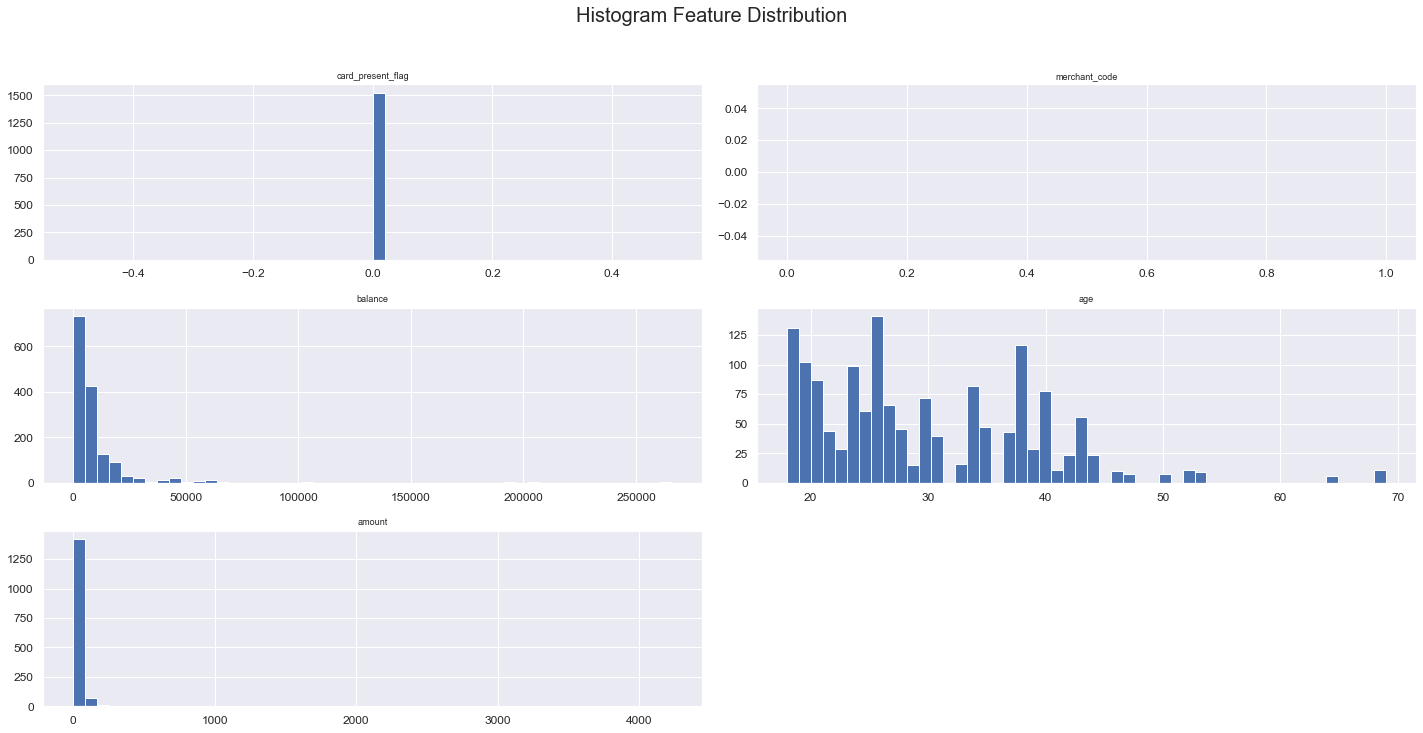

In [12]:
df3.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

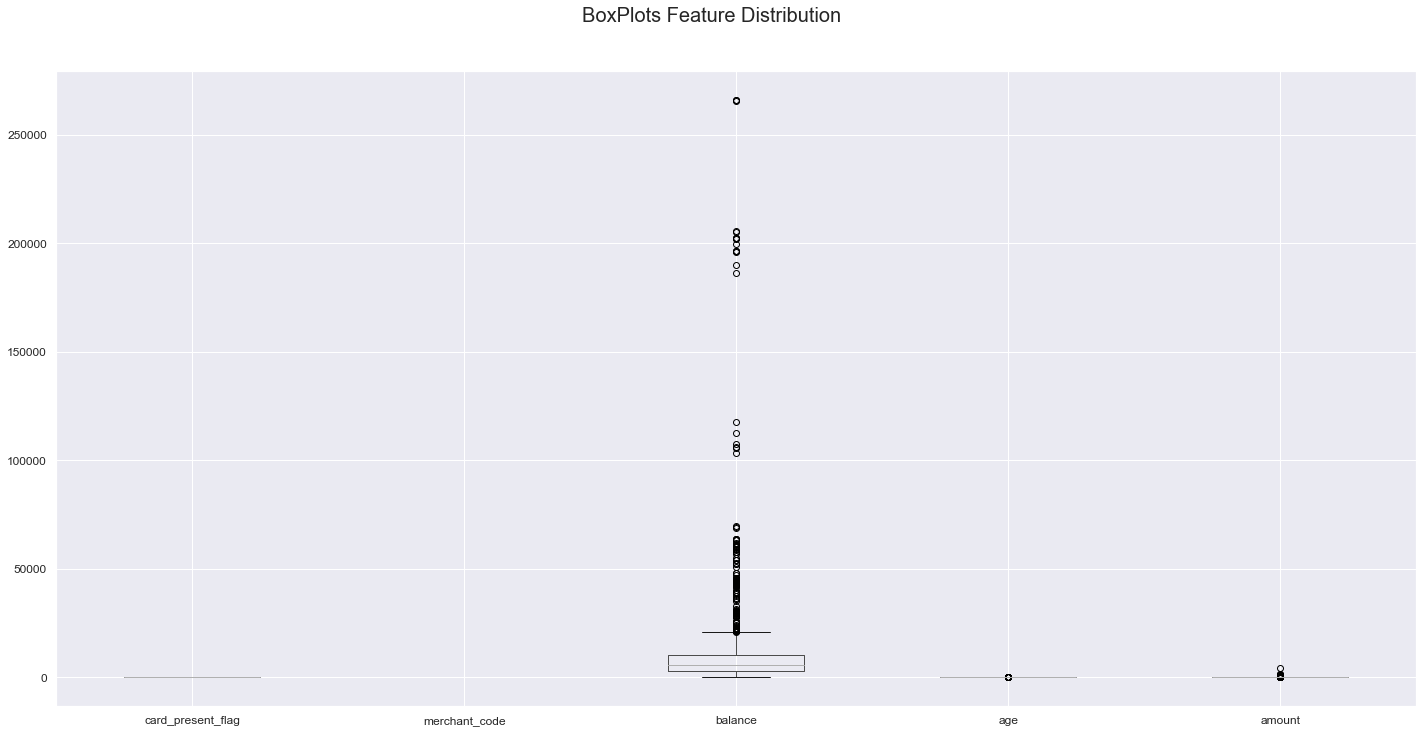

In [13]:
df3.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             1523 non-null   object 
 1   card_present_flag  1523 non-null   float64
 2   bpay_biller_code   0 non-null      object 
 3   account            1523 non-null   object 
 4   currency           1523 non-null   object 
 5   long_lat           1523 non-null   object 
 6   txn_description    1523 non-null   object 
 7   merchant_id        1523 non-null   object 
 8   merchant_code      0 non-null      float64
 9   first_name         1523 non-null   object 
 10  balance            1523 non-null   float64
 11  date               1523 non-null   object 
 12  gender             1523 non-null   object 
 13  age                1523 non-null   int64  
 14  merchant_suburb    1523 non-null   object 
 15  merchant_state     1523 non-null   object 
 16  extraction         1523 

## Data Preprocessing

### Feature Engineering

In [15]:
df3.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account', 'currency', 'long_lat', 'txn_description', 'merchant_id', 'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age', 'merchant_suburb', 'merchant_state', 'extraction', 'amount', 'transaction_id', 'country', 'customer_id', 'merchant_long_lat', 'movement'], dtype='object')

In [16]:
df3.drop(['status', 'card_present_flag', 'bpay_biller_code', 'account', 'currency', 'long_lat', 
          'txn_description', 'merchant_id', 'merchant_code', 'first_name'], inplace=True, axis=1)

In [17]:
df3.head()

,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,21.20,1/8/2018,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
1,275.93,1/8/2018,M,37,Lismore,NSW,2018-08-01T08:19:14.000+0000,24.77,1f12467d33ce4609890fb64978ebbcbb,Australia,CUS-2695611575,153.28 -28.81,debit
2,30583.15,1/8/2018,F,43,Mordialloc,VIC,2018-08-01T08:47:48.000+0000,12.08,49417bad354f4137971a954c26657e2d,Australia,CUS-3255104878,145.09 -38.01,debit
3,1625.34,1/8/2018,F,19,Alexandria,NSW,2018-08-01T09:11:00.000+0000,11.57,82acf03790844776b4587fd6e6f526c5,Australia,CUS-883482547,151.19 -33.92,debit
4,12529.59,1/8/2018,F,34,Findon,SA,2018-08-01T09:19:06.000+0000,33.89,89050ee5c5aa4e79b03e717518236bf9,Australia,CUS-1196156254,138.53 -34.9,debit


In [18]:
df3.drop(['date', 'merchant_suburb', 'extraction', 'transaction_id', 'country', 'customer_id', 'merchant_long_lat'], inplace=True, axis=1)

In [19]:
df3.head()

,balance,gender,age,merchant_state,amount,movement
0,21.20,F,26,NSW,14.19,debit
1,275.93,M,37,NSW,24.77,debit
2,30583.15,F,43,VIC,12.08,debit
3,1625.34,F,19,NSW,11.57,debit
4,12529.59,F,34,SA,33.89,debit


### Save to CSV

In [20]:
df3.to_csv("final.csv", index=False)

## Regression Analysis

## Logistic Regression (StatsModel)

In [21]:
df3.columns

Index(['balance', 'gender', 'age', 'merchant_state', 'amount', 'movement'], dtype='object')

In [22]:
df3.movement.value_counts()

debit    1523
Name: movement, dtype: int64

In [23]:
df4 = pd.get_dummies(data=df3)

In [24]:
df4

,balance,age,amount,gender_F,gender_M,merchant_state_ACT,merchant_state_NSW,merchant_state_NT,merchant_state_QLD,merchant_state_SA,merchant_state_TAS,merchant_state_VIC,merchant_state_WA,movement_debit
0,21.20,26,14.19,1,0,0,1,0,0,0,0,0,0,1
1,275.93,37,24.77,0,1,0,1,0,0,0,0,0,0,1
2,30583.15,43,12.08,1,0,0,0,0,0,0,0,1,0,1
3,1625.34,19,11.57,1,0,0,1,0,0,0,0,0,0,1
4,12529.59,34,33.89,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,9901.03,47,15.91,1,0,0,0,0,0,0,0,0,1,1
1519,2194.26,26,25.88,1,0,0,0,0,1,0,0,0,0,1
1520,12963.75,19,9.90,0,1,0,0,0,0,0,0,0,1,1
1521,5540.27,31,70.51,0,1,0,1,0,0,0,0,0,0,1


In [25]:
df4.columns

Index(['balance', 'age', 'amount', 'gender_F', 'gender_M', 'merchant_state_ACT', 'merchant_state_NSW', 'merchant_state_NT', 'merchant_state_QLD', 'merchant_state_SA', 'merchant_state_TAS', 'merchant_state_VIC', 'merchant_state_WA', 'movement_debit'], dtype='object')

In [26]:
y = df4['movement_debit']
X = df4[['balance', 'age', 'amount', 'gender_F', 'gender_M', 'merchant_state_ACT', 'merchant_state_NSW', 'merchant_state_NT', 'merchant_state_QLD', 'merchant_state_SA', 'merchant_state_TAS', 'merchant_state_VIC', 'merchant_state_WA']]

In [27]:
X = sm.add_constant(X)

In [28]:
model = sm.Logit(y, X).fit()

PerfectSeparationError: Perfect separation detected, results not available

In [ ]:
model.summary()

In [ ]:
logitfit = smf.logit(formula = 'DF ~ Debt_Service_Coverage + cash_security_to_curLiab + TNW', data = hgc).fit()

In [ ]:
logitfit = smf.logit(formula = 'DF ~ TNW + C(seg2)', data = hgcdev).fit()